## 1. Statistical tests

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Let's create two sets of observations with a pretty close means
data1 = np.array([0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869])
data2 = np.array([1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169])

In [3]:
print('Mean of first array: {:.2f}'.format(data1.mean()))
print('Mean of second array: {:.2f}'.format(data2.mean()))

Mean of first array: -0.32
Mean of second array: -0.15


Can we say that they are different or not really?

In [4]:
# If we want to repeat the analysis later with a bigger mean for data 1
# data1 = data1 + 2

In [5]:
# Let's combine the arrays into a dataframe
data = pd.DataFrame()
data['observation'] = np.concatenate([data1, data2])
data['group'] = [1]*len(data1) + [2]*len(data2)

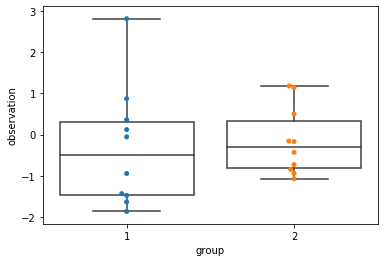

In [6]:
# Comparison of the distribution and median with a boxplot

# Visualization #1 - basic
# sns.boxplot(data=data, y='observation', x='group')

# Visualization #2 - remove color from the boxplot (leaving quartiles and whiskers)
# and add a layer with all the observations - in this case there is not many of them but 
# sometimes we can see more patterns
sns.boxplot(data=data, y='observation', x='group', boxprops={'facecolor':'None'})
sns.swarmplot(data=data, y='observation', x='group')

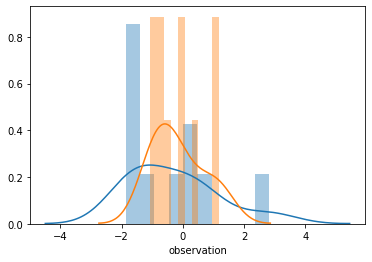

In [7]:
# Basic distribution
sns.distplot(data[data['group']==1]['observation'], bins=10)
sns.distplot(data[data['group']==2]['observation'], bins=10)

In [8]:
# Statistical testing
# Which test should I use?: https://www.youtube.com/watch?v=I10q6fjPxJ0
# P-values and siginificance tests: https://www.youtube.com/watch?v=KS6KEWaoOOE
# P-values calculation: https://www.youtube.com/watch?v=8Aw45HN5lnA

In [9]:
## Example of the Paired Student's t-test (there's also unpaired one: "from scipy.stats import ttest_ind")
# Are means of the groups the same?
# Hypothesis we're testing: "Means of the groups are the same"
# Alternative hypothesis: "Means of the groups are not the same"
from scipy.stats import ttest_rel
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same mean')
else:
    print('Probably different mean')

stat=-0.334, p=0.746
Probably the same mean


In [10]:
# Another type of test - Contingency table chi-square test
# Great explanation: https://www.youtube.com/watch?v=hpWdDmgsIRE

In [11]:
# Chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# Contingency table
table = [[10, 20, 30],
          [6,  9,  17]]
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

# First way to interpret the result, by test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

# Second way to interpret the result, by  p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

[[10, 20, 30], [6, 9, 17]]
dof=2
[[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]
probability=0.950, critical=5.991, stat=0.272
Independent (fail to reject H0)
significance=0.050, p=0.873
Independent (fail to reject H0)


In [12]:
# Another example - students with scores
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'pre_score': [4, 24, 31, 2, 3],
        'mid_score': [25, 94, 57, 62, 70],
        'post_score': [5, 43, 23, 23, 51]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'pre_score', 'mid_score', 'post_score'])
df

,first_name,pre_score,mid_score,post_score
0,Jason,4,25,5
1,Molly,24,94,43
2,Tina,31,57,23
3,Jake,2,62,23
4,Amy,3,70,51


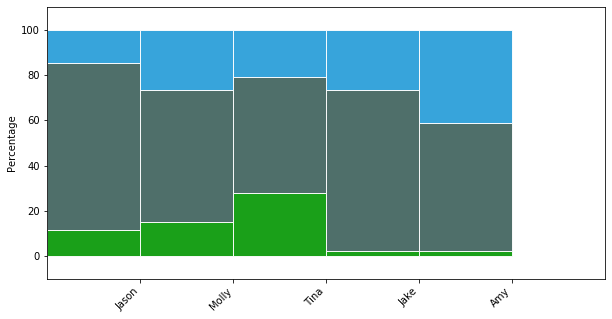

In [13]:
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(df['pre_score']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j+k for i,j,k in zip(df['pre_score'], df['mid_score'], df['post_score'])]

# Create the percentage of the total score the pre_score value for each participant was
pre_rel = [i / j * 100 for  i,j in zip(df['pre_score'], totals)]

# Create the percentage of the total score the mid_score value for each participant was
mid_rel = [i / j * 100 for  i,j in zip(df['mid_score'], totals)]

# Create the percentage of the total score the post_score value for each participant was
post_rel = [i / j * 100 for  i,j in zip(df['post_score'], totals)]

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       pre_rel, 
       # labeled 
       label='Pre Score', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#019600',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       mid_rel, 
       # with pre_rel
       bottom=pre_rel, 
       # labeled 
       label='Mid Score', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#3C5F5A', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using post_rel data
       post_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j for i,j in zip(pre_rel, mid_rel)], 
       # labeled 
       label='Post Score',
       # with alpha
       alpha=0.9, 
       # with color
       color='#219AD8', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Set the ticks to be first names
plt.xticks(tick_pos, df['first_name'])
ax.set_ylabel("Percentage")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# shot plot
plt.show()

In [14]:
# Extract values from the dataframe to create a contingency table
df_values = df.iloc[:, 1:].to_numpy()

In [15]:
df_values

array([[ 4, 25,  5],
       [24, 94, 43],
       [31, 57, 23],
       [ 2, 62, 23],
       [ 3, 70, 51]], dtype=int64)

In [16]:
# Question: are scores idependent of students?
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(df_values)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=8
[[ 4.20889749 20.25531915  9.53578337]
 [19.9303675  95.91489362 45.15473888]
 [13.74081238 66.12765957 31.13152805]
 [10.76982592 51.82978723 24.40038685]
 [15.35009671 73.87234043 34.77756286]]
probability=0.950, critical=15.507, stat=56.237
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


## 2. Feature engineering

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [18]:
daily_temp = pd.read_csv('daily-min-temperatures.csv')

In [19]:
daily_temp.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [20]:
daily_temp.shape

(3650, 2)

In [22]:
daily_temp['Date'][0]

'1981-01-01'

In [23]:
daily_temp['Date_ts'] = pd.to_datetime(daily_temp['Date'])

In [24]:
daily_temp['Date_ts'][0]

Timestamp('1981-01-01 00:00:00')

In [25]:
daily_temp['Date_dt'] = daily_temp['Date_ts'].apply(lambda x: x.date())

In [26]:
daily_temp['Date_dt'][0]

datetime.date(1981, 1, 1)

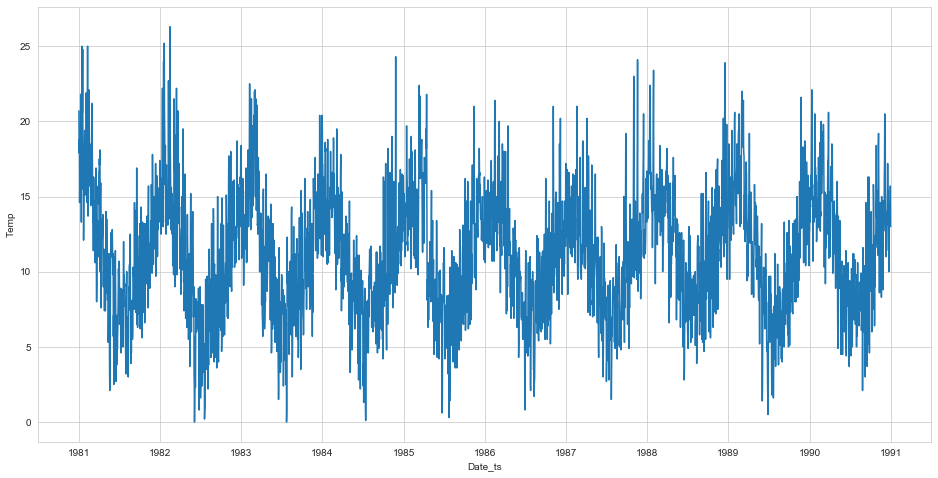

In [27]:
plt.figure(figsize=(16,8))
sns.lineplot(data=daily_temp, x="Date_ts", y="Temp")

In [28]:
timestamp_example = daily_temp['Date_ts'][0]

In [29]:
timestamp_example

Timestamp('1981-01-01 00:00:00')

In [30]:
def add_datepart(dt):
    return {'year': dt.year,
            'month': dt.month,
            'day': dt.day,
            'hour': dt.hour,
            'minute': dt.minute,
            'second': dt.second,
            'dayofyear': dt.dayofyear,
            'weekofyear': dt.weekofyear,
            'dayofweek': dt.dayofweek,
            'quarter': dt.quarter,
            'days_in_month': dt.days_in_month,
            'is_month_start': dt.is_month_start,
            'is_month_end': dt.is_month_end,
            'is_quarter_start': dt.is_quarter_start,
            'is_quarter_end': dt.is_quarter_end,
            'is_year_start': dt.is_year_start,
            'is_year_end': dt.is_year_end,
            'is_leap_year': dt.is_leap_year}

In [31]:
date_features = pd.DataFrame(daily_temp.Date_ts.apply(lambda x: add_datepart(x)).tolist())

data_processed = pd.concat([daily_temp, date_features], axis=1)

In [32]:
date_features.head()

,year,month,day,hour,minute,second,dayofyear,weekofyear,dayofweek,quarter,days_in_month,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_leap_year
0,1981,1,1,0,0,0,1,1,3,1,31,True,False,True,False,True,False,False
1,1981,1,2,0,0,0,2,1,4,1,31,False,False,False,False,False,False,False
2,1981,1,3,0,0,0,3,1,5,1,31,False,False,False,False,False,False,False
3,1981,1,4,0,0,0,4,1,6,1,31,False,False,False,False,False,False,False
4,1981,1,5,0,0,0,5,2,0,1,31,False,False,False,False,False,False,False


In [33]:
data_processed

,Date,Temp,Date_ts,Date_dt,year,month,day,hour,minute,second,...,dayofweek,quarter,days_in_month,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_leap_year
0,1981-01-01,20.7,1981-01-01,1981-01-01,1981,1,1,0,0,0,...,3,1,31,True,False,True,False,True,False,False
1,1981-01-02,17.9,1981-01-02,1981-01-02,1981,1,2,0,0,0,...,4,1,31,False,False,False,False,False,False,False
2,1981-01-03,18.8,1981-01-03,1981-01-03,1981,1,3,0,0,0,...,5,1,31,False,False,False,False,False,False,False
3,1981-01-04,14.6,1981-01-04,1981-01-04,1981,1,4,0,0,0,...,6,1,31,False,False,False,False,False,False,False
4,1981-01-05,15.8,1981-01-05,1981-01-05,1981,1,5,0,0,0,...,0,1,31,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,1990-12-27,14.0,1990-12-27,1990-12-27,1990,12,27,0,0,0,...,3,4,31,False,False,False,False,False,False,False
3646,1990-12-28,13.6,1990-12-28,1990-12-28,1990,12,28,0,0,0,...,4,4,31,False,False,False,False,False,False,False
3647,1990-12-29,13.5,1990-12-29,1990-12-29,1990,12,29,0,0,0,...,5,4,31,False,False,False,False,False,False,False
3648,1990-12-30,15.7,1990-12-30,1990-12-30,1990,12,30,0,0,0,...,6,4,31,False,False,False,False,False,False,False


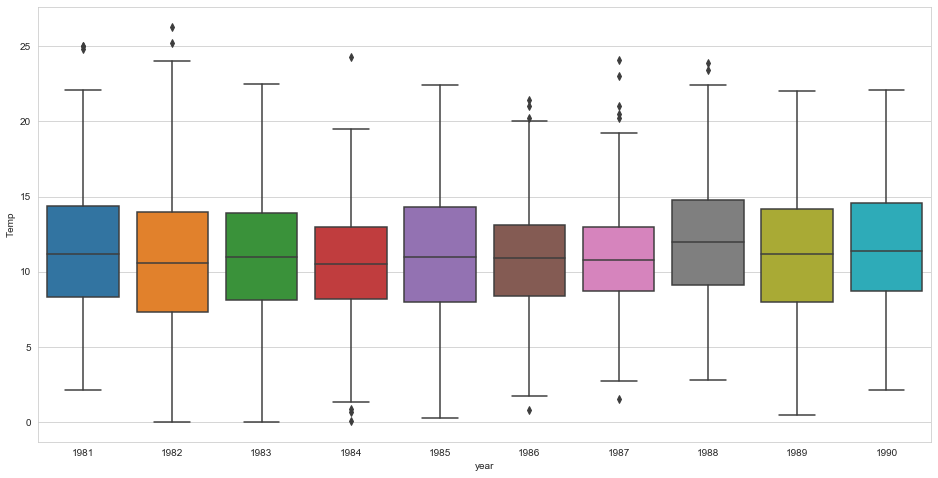

In [34]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data_processed, x="year", y="Temp")

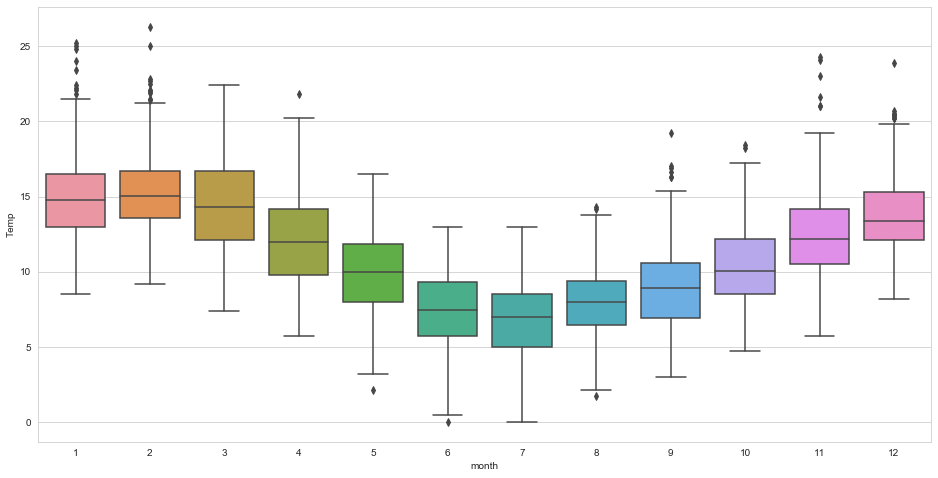

In [35]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data_processed, x="month", y="Temp")

Text(0.5, 0.98, 'Additive decomposition of Temperature')

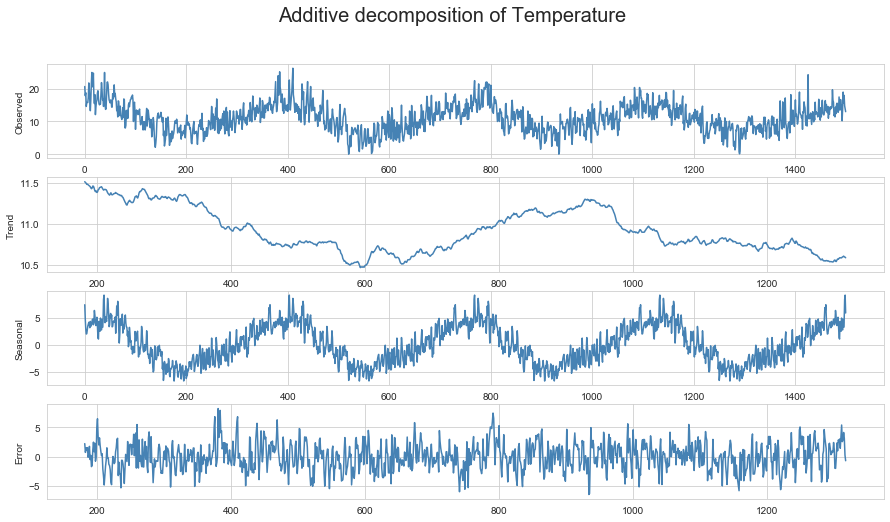

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_processed['Temp'][:1500], model='additive', period=365)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,8))
result.observed.plot(ax=ax1, color='steelblue')
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2, color='steelblue')
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3, color='steelblue')
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4, color='steelblue')
ax4.set_ylabel('Error')

fig.suptitle('Additive decomposition of Temperature', fontsize=20)

## 3. Feature selection

In [37]:
from sklearn.datasets import load_iris

In [38]:
data = load_iris()

In [39]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [40]:
X = data['data']
y = data['target']

In [41]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [42]:
data_iris = pd.DataFrame(data['data'], columns=data['feature_names'])
data_iris['Species'] = data['target']
data_iris['Species'] = data_iris['Species'].map(lambda x: data['target_names'][x])

In [43]:
data_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


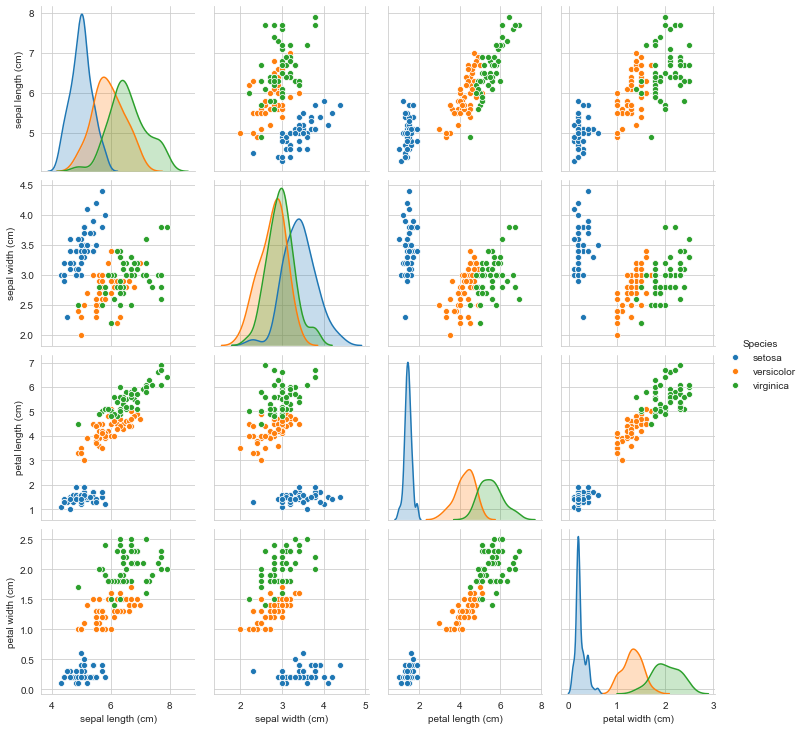

In [44]:
sns.pairplot(data_iris, hue='Species', palette=sns.color_palette('tab10'))

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [46]:
# Select two features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=1)
X_kbest = chi2_selector.fit_transform(X, y)

In [47]:
# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 4
Reduced number of features: 1


In [48]:
X_kbest[1]

array([1.4])

In [49]:
X[1]

array([4.9, 3. , 1.4, 0.2])

## 4. Model performance

In [50]:
from sklearn.datasets import make_classification
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [51]:
X.shape

(1000, 20)

In [52]:
y.shape

(1000,)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [54]:
from sklearn.linear_model import LogisticRegression
current_model = 'Logistic Regression'
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
model.predict(X_test)

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0])

In [56]:
model.predict_proba(X_test)[:, 1]

array([9.93724319e-01, 9.95955265e-01, 6.43747666e-03, 1.11217943e-01,
       9.97977135e-01, 4.43326070e-01, 2.93083394e-02, 3.02462440e-02,
       9.65470141e-01, 7.77633683e-01, 1.36838714e-02, 6.02084011e-01,
       1.11567268e-02, 9.66551470e-01, 9.41758700e-01, 8.02249307e-01,
       1.16297315e-01, 9.25542601e-01, 1.08762807e-01, 8.91848097e-01,
       7.84253823e-01, 5.46981823e-01, 3.52260358e-02, 7.13345407e-01,
       1.06454443e-02, 9.51063620e-01, 6.67235781e-01, 9.95262564e-01,
       8.52871107e-02, 2.95648209e-01, 6.87717350e-01, 7.65316193e-01,
       1.14886798e-01, 8.33727499e-01, 3.54214989e-02, 1.20152087e-01,
       9.80484123e-01, 9.39116976e-01, 9.68701673e-01, 3.16582027e-01,
       1.21009457e-02, 3.61108246e-02, 9.35975314e-02, 9.82361621e-01,
       7.08665622e-03, 4.68592947e-01, 4.95158965e-01, 9.93893000e-01,
       1.34412441e-02, 1.91206527e-01, 3.15266203e-02, 6.86900615e-01,
       9.78627631e-01, 1.74917315e-01, 5.92583911e-02, 8.68081435e-01,
      

In [57]:
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

In [59]:
ns_probs = [0 for _ in range(len(y_test))]

No Skill: ROC AUC=0.500
Logistic Regression: ROC AUC=0.919


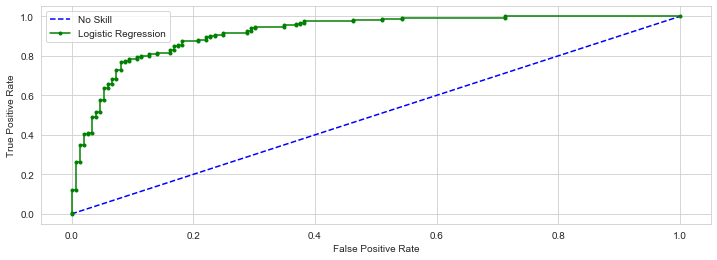

In [60]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.figure(figsize=(12,4))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [61]:
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[128,  21],
       [ 28, 123]], dtype=int64)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       149
           1       0.85      0.81      0.83       151

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [64]:
performance_report = classification_report(y_test, y_pred, output_dict=True)

In [65]:
performance_report

{'0': {'precision': 0.8205128205128205,
  'recall': 0.8590604026845637,
  'f1-score': 0.839344262295082,
  'support': 149},
 '1': {'precision': 0.8541666666666666,
  'recall': 0.8145695364238411,
  'f1-score': 0.8338983050847457,
  'support': 151},
 'accuracy': 0.8366666666666667,
 'macro avg': {'precision': 0.8373397435897436,
  'recall': 0.8368149695542024,
  'f1-score': 0.8366212836899138,
  'support': 300},
 'weighted avg': {'precision': 0.8374519230769231,
  'recall': 0.8366666666666667,
  'f1-score': 0.8366031304992126,
  'support': 300}}

In [66]:
def evaluate_performance(y_test, y_pred):
    performance_report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = performance_report['accuracy']
    precision = performance_report['1']['precision']
    recall = performance_report['1']['recall']
    
    return {'accuracy': accuracy,
            'precision': precision,
            'recall': recall}

In [67]:
evaluate_performance(y_test, y_pred)

{'accuracy': 0.8366666666666667,
 'precision': 0.8541666666666666,
 'recall': 0.8145695364238411}

In [68]:
model_summary = evaluate_performance(y_test, y_pred)
model_summary['model'] = current_model
model_summary['auroc'] = lr_auc

In [69]:
pd.DataFrame([model_summary])

,accuracy,precision,recall,model,auroc
0,0.836667,0.854167,0.81457,Logistic Regression,0.918619
